### Convolutional neural network for MNIST classification
The task is to classify MNIST dataset, series of grey-scale images with resolution 28x28 pixels (784 features). While this resolution is manageable in classic feedforward neural network architecture with 784 input neurons, most images have way more pixels and 3 color channels. For example 4K Ultra HD resolution is 3840 x 2160 x 3 channels, which would be 24 883 200 different neurons. Regular networks are therefore not scaleable for image classificaton.  
Fortunately, there is little correlation between 2 pixels in picture unless the pixels are very close to each other. The fully connected architecture is therefore not necessary and it leads us to the idea of convolutional and pooling layers.
#### Convolutional layer
This layer is the first one that extracts features from images via convolution - it preserves the relationships between different parts of an image, while filtering the image with a smaller pixel filter to decrease the resolution. When we apply a 4x4 filter on a 7x7 image, we will get 4x4 output, which is 67% decrease in number of pixels.
#### Pooling layer
Pooling layer is usually inserted after a convolutional layer to reduce the spatial size of the representation, which reduces the parameter counts and overall computational complexity. A pooling size is selected (e.g. 2x2) and then a maximum / average / sum is calculated for window of pixels.
#### Fully connected layers
This is the architecture of classic neural network, where each parameter is linked to one another. The output of last pooling layer is the input for fully connected layers.  
<figure>
    <img src="images/convolutional_architecture.jpeg" width="80%"/>
    <figcaption>Convolutional network architecture. MathWorks, Introducing Deep Learning with MATLAB, https://www.mathworks.com/content/dam/mathworks/tag-team/Objects/d/80879v00_Deep_Learning_ebook.pdf</figcaption>
</figure>

### package imports, data loading, image plotting

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train type: {}".format(type(x_train)))
print("y_train type: {}".format(type(y_train)))
print("x_train original shape: {}".format(x_train.shape))
print("y_train original shape: {}".format(y_train.shape))

Using TensorFlow backend.


x_train type: <class 'numpy.ndarray'>
y_train type: <class 'numpy.ndarray'>
x_train original shape: (60000, 28, 28)
y_train original shape: (60000,)


In [4]:
#solve kernel problems during training of CNN
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

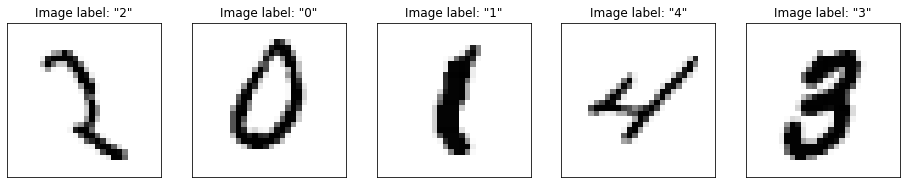

In [5]:
#plot several images from the train set
plt.figure(figsize=(16,5))
picture_indeces = [444,666,7788,13987,33145]
for i in range(len(picture_indeces)):
    ax = plt.subplot(1,len(picture_indeces),i+1)
    image_index = picture_indeces[i]
    plt.imshow(x_train[image_index], cmap='Greys')
    #don't show ticks and labels
    plt.tick_params(axis='x',which='both', bottom=False, labelbottom=False)
    plt.tick_params(axis='y',which='both', left=False, labelleft=False)
    plt.title("Image label: \"{}\"".format(y_train[image_index]))

### data prepropcessing - reshaping, normalization
Keras API accepts 4-dims numpy arrays, MNIST has 3-dims. Data for all neural network models needs to be normalized.

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print("x_train shape: {}".format(x_train.shape))
print("x_test shape: {}".format(x_test.shape))

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


### convolutional network implementation

It is always possible to experiment with kernel size, pool size, activation functions, dropout rate, and number of neurons in the first Dense layer to get a better result. The shape of input layer and number of neurons in output layer is determined by our dataset.

In [7]:
cnn = Sequential()
cnn.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) #convolutional layer
cnn.add(MaxPooling2D(pool_size=(2, 2)))                         #pooling layer
cnn.add(Flatten())                                              #flattening for fully connected layer
cnn.add(Dense(128, activation=tf.nn.relu))                      #fully connected layer with ReLU activation function (128 neurons, but this number can be tuned)
cnn.add(Dropout(0.2))                                           #disregard selected neurons to fight overfitting
cnn.add(Dense(10,activation=tf.nn.softmax))                     #softmax output layer (10 classes in MNIST means that there need to be 10 neurons)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Optimizer, loss function, metrics and epochs can also be tuned. Other optimizers are usually outperformed by _adam_ optimizer. 

In [8]:
cnn.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])
cnn.fit(x=x_train,y=y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 126s 2ms/step - loss: 0.2047 - acc: 0.9376
Epoch 2/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0841 - acc: 0.9745
Epoch 3/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0600 - acc: 0.9817
Epoch 4/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0467 - acc: 0.9852
Epoch 5/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0362 - acc: 0.9874
Epoch 6/10
60000/60000 [==============================] - 123s 2ms/step - loss: 0.0312 - acc: 0.9895
Epoch 7/10
60000/60000 [==============================] - 126s 2ms/step - loss: 0.0273 - acc: 0.9909
Epoch 8/10
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0235 - acc: 0.9918
Epoch 9/10
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0205 - acc: 0.9929
Epoch 10/10
60000/60000 [==================

In [9]:
cnn.evaluate(x_test, y_test)

10000/10000 [==============================] - 10s 970us/step


[0.06352144173665401, 0.9843]

Even after only 10 epochs, the model has accuracy of 98.43%

#### model saving
It is not recommended to use pickle or cPickle to save a Keras model. Use `model.save(filepath)` to save a Keras model into a single HDF5 file which will contain:
- the architecture of the model, allowing to re-create the model
- the weights of the model
- the training configuration (loss, optimizer)
- the state of the optimizer, allowing to resume training exactly where you left off.

In [10]:
cnn.save('cnn_model.h5')

In [12]:
# from keras.models import load_model
# loaded_model = load_model('cnn_model.h5')
# loaded_model.evaluate(x_test, y_test)